In [2]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\manea\AppData\Local\Temp\ipykernel_15312\3225937507.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Understanding

In [3]:
# importing the datasets
data = pd.read_csv("./train.csv")
unseen = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample.csv")
data_dict = pd.read_csv("./data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [4]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [5]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [6]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
data.describe(include="all")

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


In [8]:
data['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

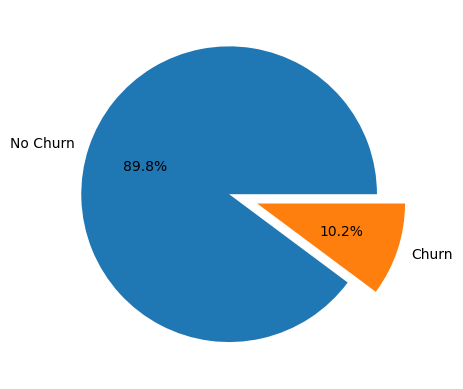

In [9]:
plt.pie(data['churn_probability'].value_counts(),labels=["No Churn","Churn"],autopct="%1.1f%%",explode=[0,0.2])
plt.show()

- We have about 10.2% churn rate as of now.

## Data Cleaning and Preprocessing

#### Function to impute values

In [10]:
from typing import Union

def fill_null_value(data:pd.DataFrame,col:str,value:Union[None,str,int] = None,type_of_imputation: Union[None, str] = None):

    if type_of_imputation not in [None, "mean", "median"]:
        raise ValueError("type_of_imputation must be None, 'mean', or 'median'")

    if type_of_imputation == None:
        data[col] = data[col].fillna(value=value)

    elif type_of_imputation == "mean":
        data[col] = data[col].fillna(data[col].mean())

    elif type_of_imputation == "median":
        data[col] = data[col].fillna(data[col].median())

    return "Imputation Successful..."

#### Function to drop columns

In [11]:
def drop_cols(data:pd.DataFrame,cols:Union[list,str]):

    print(f"Number of cols before dropping: {data.shape[1]}")

    data = data.drop(cols,axis=1)

    print(f"Number of cols after dropping: {data.shape[1]}")

    return data

#### Function to get a summary of null values

In [12]:
def null_values_df(data):

    # Initialize lists to store column names and their corresponding null value counts
    column_list = []
    null_value_list = []
    percent_missing = []

    # Iterate through each column in the DataFrame
    for i in data.columns:
        # Check if the column has any null values
        if data[i].isna().sum() > 0:
            column_list.append(i)  # Append column name to the list
            null_value_list.append(data[i].isna().sum())  # Append count of null values to the list
            percent_missing.append((data[i].isna().sum()/data.shape[0])*100) # Append the percentage of null values to the list

    # Create a DataFrame from the lists
    null_values_df_report = pd.DataFrame({'Column': column_list,'Null Values': null_value_list,'Percent_Missing':percent_missing})

    return null_values_df_report

In [13]:
null_values_df(data)

,Column,Null Values,Percent_Missing
0,loc_og_t2o_mou,702,1.002871
1,std_og_t2o_mou,702,1.002871
2,loc_ic_t2o_mou,702,1.002871
3,last_date_of_month_7,399,0.570008
4,last_date_of_month_8,733,1.047158
...,...,...,...
120,night_pck_user_7,52134,74.478207
121,night_pck_user_8,51582,73.689624
122,fb_user_6,52431,74.902499
123,fb_user_7,52134,74.478207


#### loc_og_t2o_mou & std_og_t2o_mou & loc_ic_t2o_mou

In [14]:
data['loc_og_t2o_mou'].value_counts(), data['std_og_t2o_mou'].value_counts(), data['loc_ic_t2o_mou'].value_counts()

(loc_og_t2o_mou
 0.0    69297
 Name: count, dtype: int64,
 std_og_t2o_mou
 0.0    69297
 Name: count, dtype: int64,
 loc_ic_t2o_mou
 0.0    69297
 Name: count, dtype: int64)

Lets just drop these columns are they have no variety of values for a ML model

In [15]:
data = drop_cols(data,['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'])

Number of cols before dropping: 172
Number of cols after dropping: 169


#### Date Columns

lets also drop date columns as we dont think they add any value because these are of specific months itself

In [16]:
data = drop_cols(data,['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'])

Number of cols before dropping: 169
Number of cols after dropping: 166


#### Dropping empty rows for onnet and offnet columns as the percentage of missing values are very low

In [17]:
data = data.dropna(subset=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'])

In [18]:
data.shape

(63842, 166)

In [19]:
null_values_df(data)

,Column,Null Values,Percent_Missing
0,date_of_last_rech_6,513,0.803546
1,date_of_last_rech_7,459,0.718962
2,date_of_last_rech_8,1073,1.680712
3,date_of_last_rech_data_6,47632,74.609191
4,date_of_last_rech_data_7,47135,73.830707
5,date_of_last_rech_data_8,46415,72.702923
6,total_rech_data_6,47632,74.609191
7,total_rech_data_7,47135,73.830707
8,total_rech_data_8,46415,72.702923
9,max_rech_data_6,47632,74.609191


#### Date of last Rech

In [20]:
# dropping the date of last recharge columns
data = drop_cols(data,['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'])

Number of cols before dropping: 166
Number of cols after dropping: 160


#### Drop Columns >30% missing vals

In [21]:
null_values_df(data)

,Column,Null Values,Percent_Missing
0,total_rech_data_6,47632,74.609191
1,total_rech_data_7,47135,73.830707
2,total_rech_data_8,46415,72.702923
3,max_rech_data_6,47632,74.609191
4,max_rech_data_7,47135,73.830707
5,max_rech_data_8,46415,72.702923
6,count_rech_2g_6,47632,74.609191
7,count_rech_2g_7,47135,73.830707
8,count_rech_2g_8,46415,72.702923
9,count_rech_3g_6,47632,74.609191


So now there are still a lot of columns with a very high percentage of missing values. We can just drop all these columns maybe, but we will find out what each column means and does NULL value imply that the column was suppose to have 0 as value.

But also it is very highly risky to assume that a null value means 0 so we need to be cautious. But still lets just drop the columns having very high percentage of missing values.

In [22]:
# data = drop_cols(data,null_values_df(data)['Column'].to_list())

In [23]:
data = data.fillna(0)

In [24]:
null_values_df(data)

,Column,Null Values,Percent_Missing


We also need to drop id and circle id columns

In [25]:
data = drop_cols(data,['id', 'circle_id'])

Number of cols before dropping: 160
Number of cols after dropping: 158


This is what we are left with after data cleaning

In [26]:
data.shape

(63842, 158)

In [27]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 63842 entries, 0 to 69998
Data columns (total 158 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   loc_o

In [28]:
data['churn_probability']

0        0
1        0
2        0
3        0
4        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Name: churn_probability, Length: 63842, dtype: int64

In [29]:
data.describe(include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.00000,63842.000000,63842.000000,63842.000000,63842.000000,...,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000
mean,290.717910,291.918351,292.314734,132.461647,136.413560,132.63037,198.832511,201.492158,196.500873,9.621639,...,0.083769,0.088656,0.231932,0.237540,0.242019,1263.214342,71.172183,68.251293,61.006705,0.059444
std,331.281057,349.414630,355.546421,298.008091,313.774123,311.59425,315.252065,326.017934,323.360549,55.363613,...,0.647576,0.698433,0.422069,0.425579,0.428309,963.212123,273.208947,272.900585,258.841620,0.236455
min,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,100.500500,98.146750,96.834000,7.650000,7.280000,6.59250,35.580000,34.390000,32.140000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,481.000000,0.000000,0.000000,0.000000,0.000000
50%,204.841000,204.512000,204.308500,34.285000,33.530000,32.16000,97.050000,95.180000,92.180000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,925.000000,0.000000,0.000000,0.000000,0.000000
75%,378.649500,379.769000,383.365500,118.737500,118.837500,114.38750,233.025000,232.837500,229.105000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1938.000000,0.000000,0.000000,0.000000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.56000,8362.360000,7043.980000,14007.340000,2613.310000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,1.000000


Average revenue per user is negative as well so we need to fix that. Lets just drop those rows where the avg rev per user is negative.

In [30]:
data = data[(data['arpu_6'] >= 0) & (data['arpu_7'] >= 0) & (data['arpu_8'] >= 0)]

#### Splitting the data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = data.drop('churn_probability',axis=1)
y = data['churn_probability']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50688, 157), (12673, 157), (50688,), (12673,))

#### Outlier Removal

In [34]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [35]:
X_train_filtered = X_train.apply(cap_outliers, axis=0)

#### Feature selection with RFE

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=20)
fit = rfe.fit(X_train_filtered, y_train)

selected_features_rfe = X_train_filtered.columns[rfe.support_]
# rfe_df_reduced = X_train_filtered[selected_features]

In [37]:
selected_features_rfe

Index(['roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'ic_others_7', 'ic_others_8',
       'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'count_rech_2g_8', 'av_rech_amt_data_8',
       'fb_user_8'],
      dtype='object')

#### Feature selection with random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_filtered, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top n features
top_n = 20
selected_features_random_forest = X_train_filtered.columns[indices[:top_n]]

In [39]:
selected_features_random_forest

Index(['total_ic_mou_8', 'loc_ic_mou_8', 'loc_ic_t2m_mou_8', 'total_og_mou_8',
       'roam_og_mou_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'loc_og_mou_8', 'arpu_8', 'total_ic_mou_7',
       'last_day_rch_amt_8', 'aon', 'total_rech_amt_8', 'loc_ic_t2m_mou_7',
       'loc_ic_mou_7', 'arpu_7', 'offnet_mou_8', 'arpu_6', 'onnet_mou_7'],
      dtype='object')

In [40]:
selected_features = selected_features_random_forest.to_list()

In [41]:
selected_features

['total_ic_mou_8',
 'loc_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'total_og_mou_8',
 'roam_og_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_og_mou_8',
 'arpu_8',
 'total_ic_mou_7',
 'last_day_rch_amt_8',
 'aon',
 'total_rech_amt_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_mou_7',
 'arpu_7',
 'offnet_mou_8',
 'arpu_6',
 'onnet_mou_7']

#### Feature selection using xgboost

In [42]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [43]:
model = XGBClassifier()  # For classification
# model = xgb.XGBRegressor()  # Use this if you are dealing with a regression problem

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [313]:
# Get feature importances
importance_scores = model.feature_importances_
feature_names = X_train_filtered.columns

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance_scores})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)


              feature  importance
152         fb_user_8    0.195894
86     total_ic_mou_8    0.074399
68       loc_ic_mou_8    0.066198
14      roam_og_mou_8    0.024688
89       spl_ic_mou_8    0.017625
..                ...         ...
139      monthly_2g_7    0.000000
138      monthly_2g_6    0.000000
136  night_pck_user_7    0.000000
135  night_pck_user_6    0.000000
78   std_ic_t2o_mou_6    0.000000

[157 rows x 2 columns]


In [46]:
# Select top N features (e.g., top 20 features)
top_n_features = feature_importance_df.head(20)['feature']

In [47]:
top_n_features

152             fb_user_8
86         total_ic_mou_8
68           loc_ic_mou_8
14          roam_og_mou_8
89           spl_ic_mou_8
107    last_day_rch_amt_8
43           std_og_mou_7
62       loc_ic_t2m_mou_8
56         total_og_mou_8
13          roam_og_mou_7
108     total_rech_data_6
67           loc_ic_mou_7
23       loc_og_t2f_mou_8
11          roam_ic_mou_8
101      total_rech_amt_8
122    av_rech_amt_data_8
29           loc_og_mou_8
147           sachet_3g_6
113       max_rech_data_8
110     total_rech_data_8
Name: feature, dtype: object

## EDA

In [51]:
#ids = ['id','circle_id']
total_arpu_amounts = [i for i in list(data.columns) if re.search('arpu',i)]
total_amounts = [i for i in list(data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou',i)]
onnetwork_minutes = [i for i in list(data.columns) if re.search('onnet',i)]
ic_roaming_usage = [i for i in list(data.columns) if re.search('roam.+ic',i)]
og_roaming_usage = [i for i in list(data.columns) if re.search('roam.+og',i)]
postpaid_user_cost = [i for i in list(data.columns) if re.search('.+vbc',i)]
offnetwork_minutes = [i for i in list(data.columns) if re.search('offnet',i)]
average_revenue_3g = [i for i in list(data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(data.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(data.columns) if re.search('aon',i)]

#Storing them in a single flat list
variables = [#*ids, 
             *total_arpu_amounts,
             *ic_roaming_usage,
             *og_roaming_usage,
             *onnetwork_minutes,
             *postpaid_user_cost,
             *total_amounts, 
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

In [52]:
new_data = data[variables]

In [54]:
new_data['total_avg_rev_per_user'] = new_data['arpu_6'] + new_data['arpu_7'] + new_data['arpu_8']
new_data = drop_cols(new_data,['arpu_6','arpu_7','arpu_8'])

Number of cols before dropping: 45
Number of cols after dropping: 42


In [55]:
new_data['total_incoming_roaming_min_usage'] = new_data['roam_ic_mou_6'] + new_data['roam_ic_mou_7'] + new_data['roam_ic_mou_8']
new_data = drop_cols(new_data,['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'])

Number of cols before dropping: 43
Number of cols after dropping: 40


In [56]:
new_data['total_outgoing_roaming_min_usage'] = new_data['roam_og_mou_6'] + new_data['roam_og_mou_7'] + new_data['roam_og_mou_8']
new_data = drop_cols(new_data,['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'])

Number of cols before dropping: 41
Number of cols after dropping: 38


In [57]:
new_data['same_network_calls_min_usage'] = new_data['onnet_mou_6'] + new_data['onnet_mou_7'] + new_data['onnet_mou_8']
new_data = drop_cols(new_data,['onnet_mou_6','onnet_mou_7','onnet_mou_8'])

Number of cols before dropping: 39
Number of cols after dropping: 36


In [58]:
new_data['other_network_calls_min_usage'] = new_data['offnet_mou_6'] + new_data['offnet_mou_7'] + new_data['offnet_mou_8']
new_data = drop_cols(new_data,['offnet_mou_6','offnet_mou_7','offnet_mou_8'])

Number of cols before dropping: 37
Number of cols after dropping: 34


In [59]:
new_data['postpaid_user_3g'] = new_data['aug_vbc_3g'] + new_data['jul_vbc_3g'] + new_data['jun_vbc_3g']
new_data = drop_cols(new_data,['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g'])

Number of cols before dropping: 35
Number of cols after dropping: 32


In [60]:
new_data['total_rech_amount'] = new_data['total_rech_amt_6'] + new_data['total_rech_amt_7'] + new_data['total_rech_amt_8']
new_data = drop_cols(new_data,['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'])

Number of cols before dropping: 33
Number of cols after dropping: 30


In [61]:
new_data['total_og_mou'] = new_data['total_og_mou_6'] + new_data['total_og_mou_7'] + new_data['total_og_mou_8']
new_data = drop_cols(new_data,['total_og_mou_6','total_og_mou_7','total_og_mou_8'])

Number of cols before dropping: 31
Number of cols after dropping: 28


In [62]:
new_data['total_vol_3g_new_data_used'] = new_data['vol_3g_mb_6'] + new_data['vol_3g_mb_7'] + new_data['vol_3g_mb_8']
new_data = drop_cols(new_data,['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'])

Number of cols before dropping: 29
Number of cols after dropping: 26


In [63]:
new_data['total_vol_2g_new_data_used'] = new_data['vol_2g_mb_6'] + new_data['vol_2g_mb_7'] + new_data['vol_2g_mb_8']
new_data = drop_cols(new_data,['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'])

Number of cols before dropping: 27
Number of cols after dropping: 24


In [64]:
eda_df = new_data.copy()

In [65]:
eda_df['churn_probability'] = eda_df['churn_probability'].map({0:"No_Churn",1:"Churn"})

#### Age on Network

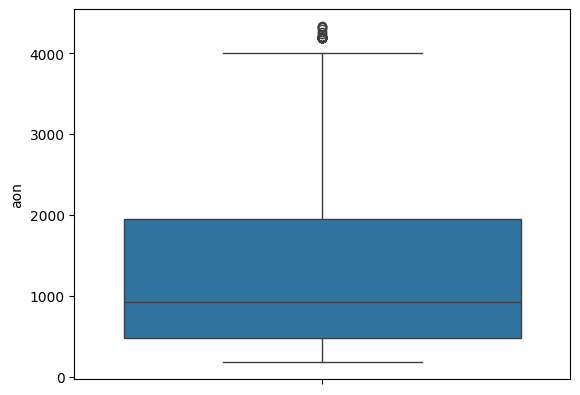

In [66]:
sns.boxplot(eda_df['aon'])
plt.show()

- Majority of people in between 500 to 2000 days using the network

In [67]:
eda_df['aon_buckets'] = pd.qcut(eda_df['aon'],q=4,labels=["1_Bucket","2_Bucket","3_Bucket","4_Bucket"])

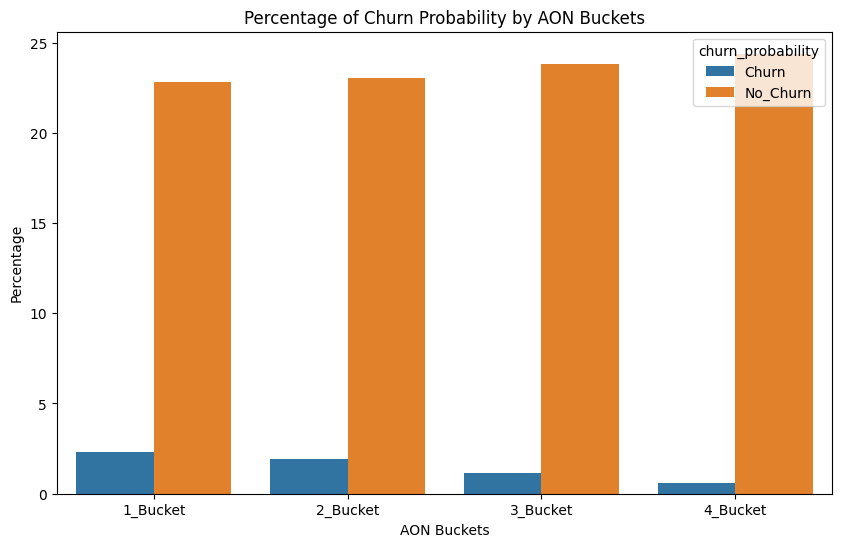

In [68]:
grouped_df = eda_df.groupby(['churn_probability', 'aon_buckets']).count()['aon'] / eda_df.shape[0] * 100
aon_percentage_df = grouped_df.reset_index(name='percentage')

plt.figure(figsize=(10, 6))
sns.barplot(x='aon_buckets', y='percentage', hue='churn_probability', data=aon_percentage_df)
plt.xlabel('AON Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Churn Probability by AON Buckets')
plt.show()

- We can see that with the more number of time on the network the less change of churn

#### Total incoming roaming min usage

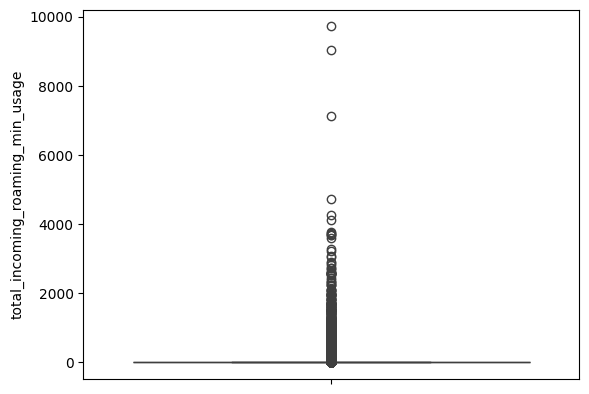

In [69]:
sns.boxplot(eda_df['total_incoming_roaming_min_usage'])
plt.show()

In [70]:
eda_df['total_incoming_roaming_min_usage'].describe()

count    63361.000000
mean        23.723350
std        134.755637
min          0.000000
25%          0.000000
50%          0.000000
75%          3.510000
max       9716.200000
Name: total_incoming_roaming_min_usage, dtype: float64

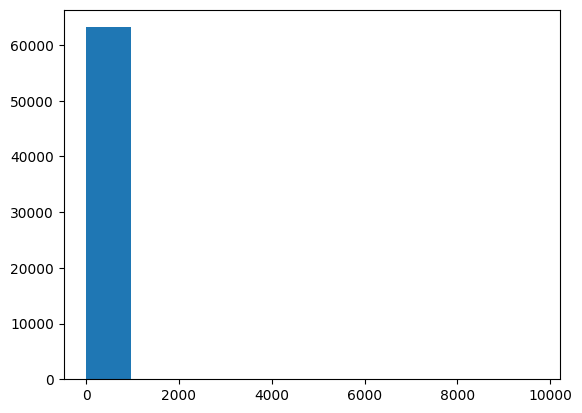

In [71]:
plt.hist(eda_df['total_incoming_roaming_min_usage'])
plt.show()

- We can see that we have very heavy outliers over here

In [72]:
eda_df['ic_roaming_usage_buckets'] = eda_df['total_incoming_roaming_min_usage'].apply(lambda x : "Below75Q" if x <= 4.0 else "Above75Q")

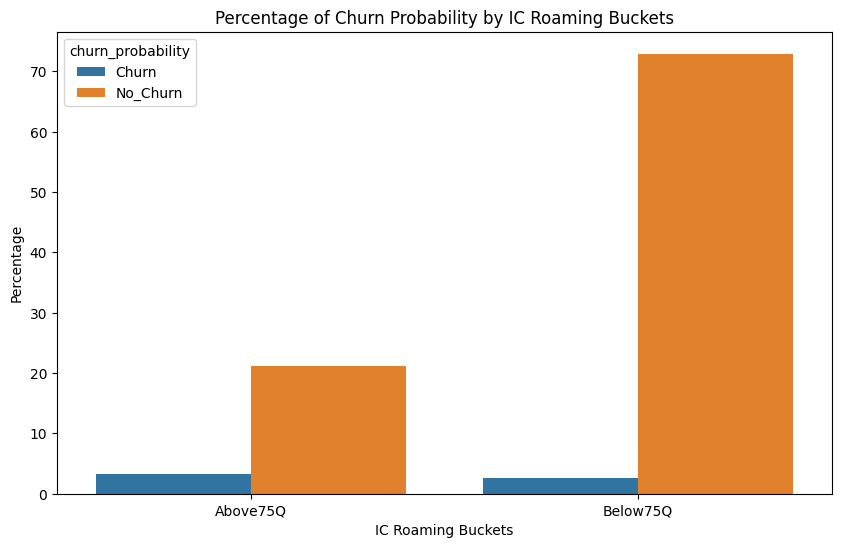

In [73]:
grouped_df_ic_roaming_usage = eda_df.groupby(['churn_probability', 'ic_roaming_usage_buckets']).count()['total_incoming_roaming_min_usage'] / eda_df.shape[0] * 100
ic_roaming_usage_percentage_df = grouped_df_ic_roaming_usage.reset_index(name='percentage')

plt.figure(figsize=(10, 6))
sns.barplot(x='ic_roaming_usage_buckets', y='percentage', hue='churn_probability', data=ic_roaming_usage_percentage_df)
plt.xlabel('IC Roaming Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Churn Probability by IC Roaming Buckets')
plt.show()

- We can clearly see that below 75th Quartile in our dataset there are most number of people who have not churned but also we need to understand there is a bias in the data as well.

#### Total outgoing roaming min usage

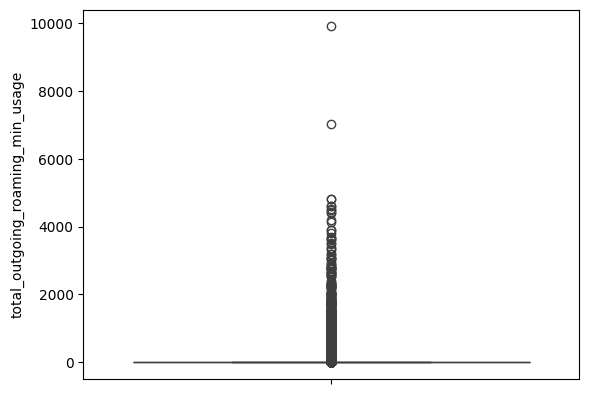

In [74]:
sns.boxplot(eda_df['total_outgoing_roaming_min_usage'])
plt.show()

In [75]:
eda_df['total_outgoing_roaming_min_usage'].describe()

count    63361.000000
mean        33.549661
std        161.153681
min          0.000000
25%          0.000000
50%          0.000000
75%          6.080000
max       9896.820000
Name: total_outgoing_roaming_min_usage, dtype: float64

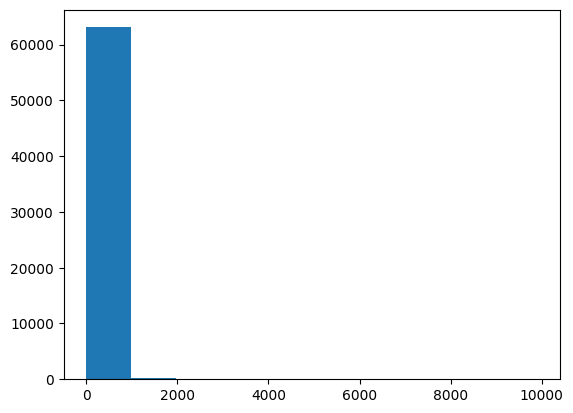

In [76]:
plt.hist(eda_df['total_outgoing_roaming_min_usage'])
plt.show()

- We can see the outliers and also data is right skewed.

In [77]:
eda_df['og_roaming_usage_buckets'] = eda_df['total_outgoing_roaming_min_usage'].apply(lambda x : "Below75Q" if x <= 4.0 else "Above75Q")

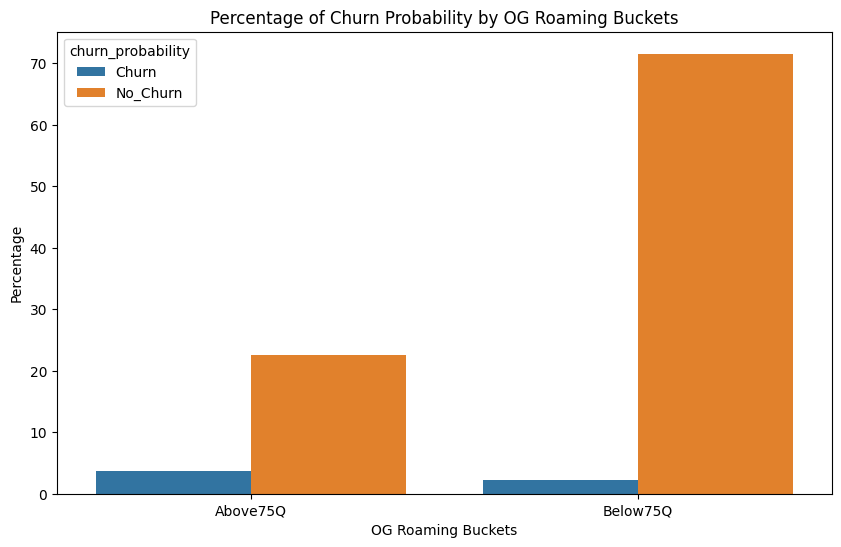

In [78]:
grouped_df_og_roaming_usage = eda_df.groupby(['churn_probability', 'og_roaming_usage_buckets']).count()['total_outgoing_roaming_min_usage'] / eda_df.shape[0] * 100
og_roaming_usage_percentage_df = grouped_df_og_roaming_usage.reset_index(name='percentage')

plt.figure(figsize=(10, 6))
sns.barplot(x='og_roaming_usage_buckets', y='percentage', hue='churn_probability', data=og_roaming_usage_percentage_df)
plt.xlabel('OG Roaming Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Churn Probability by OG Roaming Buckets')
plt.show()

- We can see that as similar to incoming roaming usage the same is the case with outgoing roaming usage.

In [79]:
data

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,0.0,0.0,0.0,1958,0.00,0.00,0.00,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0,0,0.0,1.0,0.0,710,0.00,0.00,0.00,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,0.0,0.0,0.0,882,0.00,0.00,0.00,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,0.0,0.0,0.0,982,0.00,0.00,0.00,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,...,1,0,0.0,1.0,1.0,221,0.00,0.00,0.00,0
69995,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,...,0,0,0.0,0.0,0.0,712,0.00,0.00,0.00,0
69996,372.088,258.374,279.782,77.13,68.44,78.44,335.54,227.94,263.84,0.00,...,0,0,0.0,0.0,0.0,879,0.00,0.00,0.00,0
69997,238.575,245.414,145.062,14.01,7.64,6.71,30.34,16.68,12.56,25.06,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0


#### same_network_calls_min_usage

In [80]:
eda_df['same_network_call_usage_buckets'] = pd.qcut(eda_df['same_network_calls_min_usage'],q=4,labels=["1_Bucket","2_Bucket","3_Bucket","4_Bucket"])

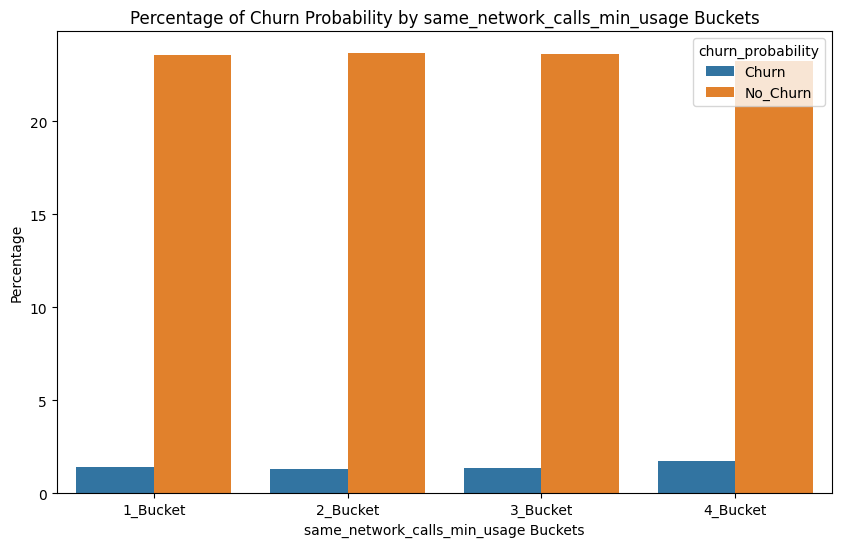

In [81]:
grouped_df = eda_df.groupby(['churn_probability', 'same_network_call_usage_buckets']).count()['same_network_calls_min_usage'] / eda_df.shape[0] * 100
same_network_calls_min_usage_percentage_df = grouped_df.reset_index(name='percentage')

plt.figure(figsize=(10, 6))
sns.barplot(x='same_network_call_usage_buckets', y='percentage', hue='churn_probability', data=same_network_calls_min_usage_percentage_df)
plt.xlabel('same_network_calls_min_usage Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Churn Probability by same_network_calls_min_usage Buckets')
plt.show()

#### other_network_calls_min_usage

In [82]:
eda_df['other_network_call_usage_buckets'] = pd.qcut(eda_df['other_network_calls_min_usage'],q=4,labels=["1_Bucket","2_Bucket","3_Bucket","4_Bucket"])

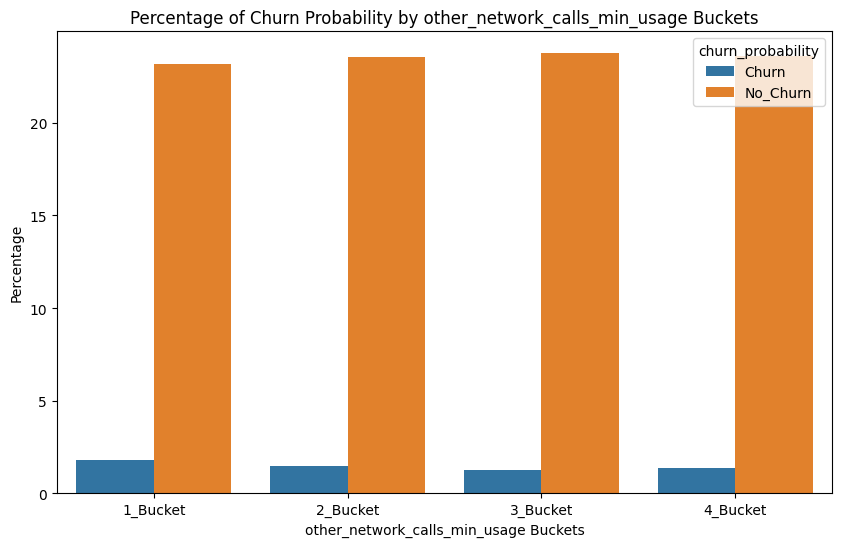

In [83]:
grouped_df = eda_df.groupby(['churn_probability', 'other_network_call_usage_buckets']).count()['other_network_calls_min_usage'] / eda_df.shape[0] * 100
other_network_calls_min_usage_percentage_df = grouped_df.reset_index(name='percentage')

plt.figure(figsize=(10, 6))
sns.barplot(x='other_network_call_usage_buckets', y='percentage', hue='churn_probability', data=other_network_calls_min_usage_percentage_df)
plt.xlabel('other_network_calls_min_usage Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Churn Probability by other_network_calls_min_usage Buckets')
plt.show()

#### total_rech_amount

In [84]:
eda_df['total_rech_amount_buckets'] = pd.qcut(eda_df['total_rech_amount'],q=4,labels=["1_Bucket","2_Bucket","3_Bucket","4_Bucket"])

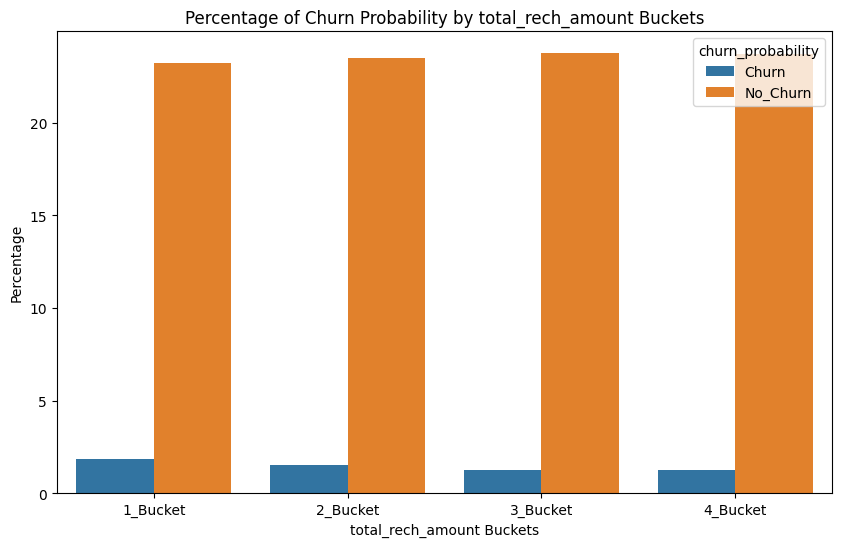

In [85]:
grouped_df = eda_df.groupby(['churn_probability', 'total_rech_amount_buckets']).count()['total_rech_amount'] / eda_df.shape[0] * 100
total_rech_amount_percentage_df = grouped_df.reset_index(name='percentage')

plt.figure(figsize=(10, 6))
sns.barplot(x='total_rech_amount_buckets', y='percentage', hue='churn_probability', data=total_rech_amount_percentage_df)
plt.xlabel('total_rech_amount Buckets')
plt.ylabel('Percentage')
plt.title('Percentage of Churn Probability by total_rech_amount Buckets')
plt.show()

In [275]:
eda_df['churn_probability'] = eda_df['churn_probability'].map({"No_Churn":0,"Churn":1})

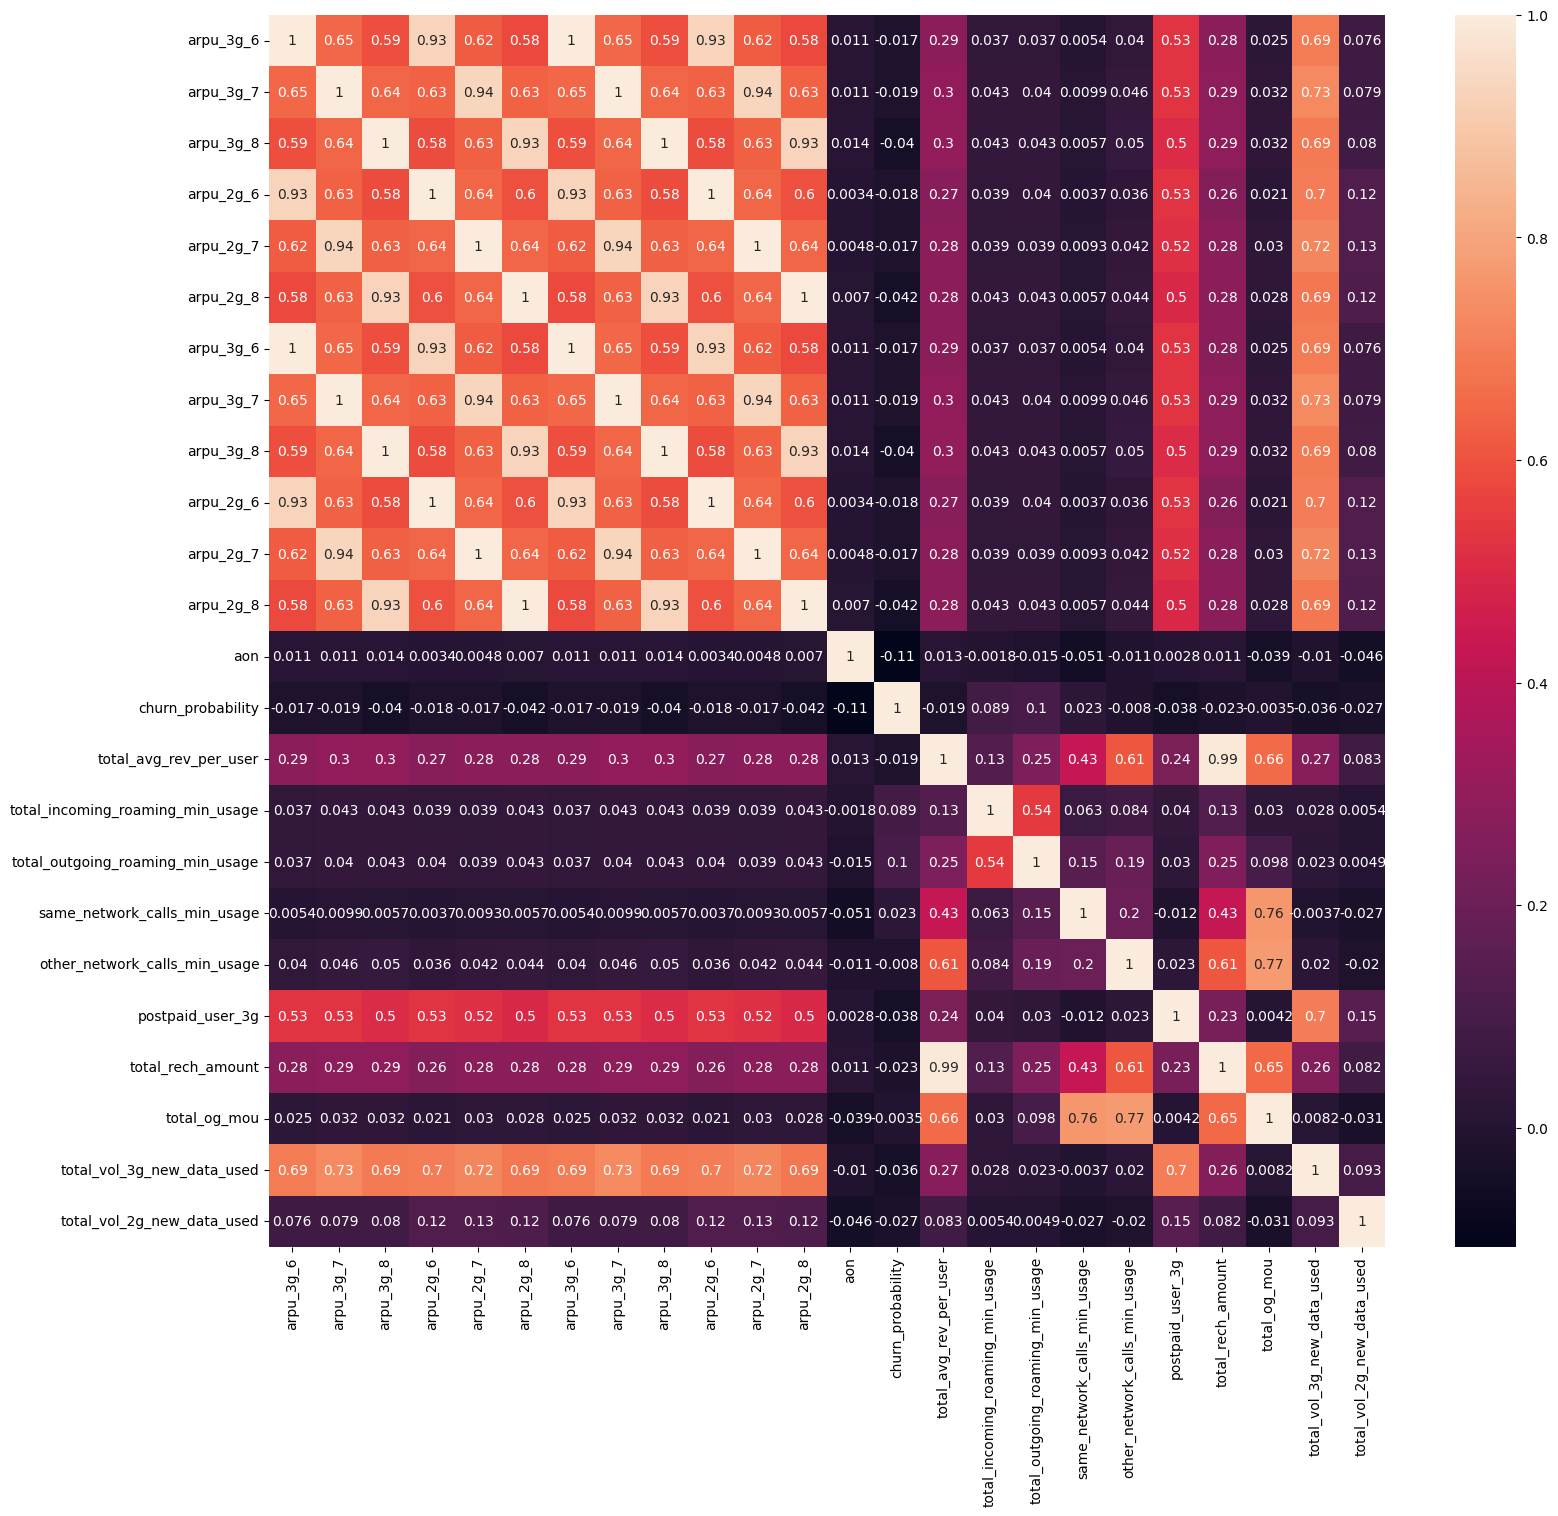

In [280]:
plt.figure(figsize=(18,16))
sns.heatmap(new_data.corr(),annot=True)
plt.show()

In [86]:
# subset = X_train_filtered[top_n_features].sample(20, axis=1)  # Select a random subset of 10 features
# sns.pairplot(subset)
# plt.show()

#### Preprocessing Data

In [87]:
# log_transformed_data = np.log1p(X_train_filtered[selected_features])

In [213]:
# implementing a custom log transform because we were having issues with the existing library of log transform
from sklearn.base import BaseEstimator, TransformerMixin
class Log1pTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Replace negative values with NaN, then fill NaN with zero or a small positive value
        X = np.where(X < 0, np.nan, X)
        X = np.nan_to_num(X, nan=0.0)
        # Apply log1p
        return np.log1p(X)

# Instantiate the custom log transformer
log_transformer = Log1pTransformer()

In [214]:
log_transformed_data = log_transformer.fit_transform(X_train_filtered[top_n_features])

In [215]:
scale = StandardScaler()
X_train_filtered_scaled = scale.fit_transform(log_transformed_data)

In [216]:
# scale = StandardScaler()
# X_train_filtered_scaled = scale.fit_transform(X_train_filtered[selected_features])

In [217]:
# X_log_transformed = np.log1p(X_train_filtered[selected_features])
# model.fit(X_log_transformed, y_train)
# log_transformed_score = model.score(np.log1p(X_test), y_test)

# PCA Model

In [218]:
pca = PCA(random_state=42)

In [219]:
pca.fit(X_train_filtered_scaled)

PCA(random_state=42)

In [220]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

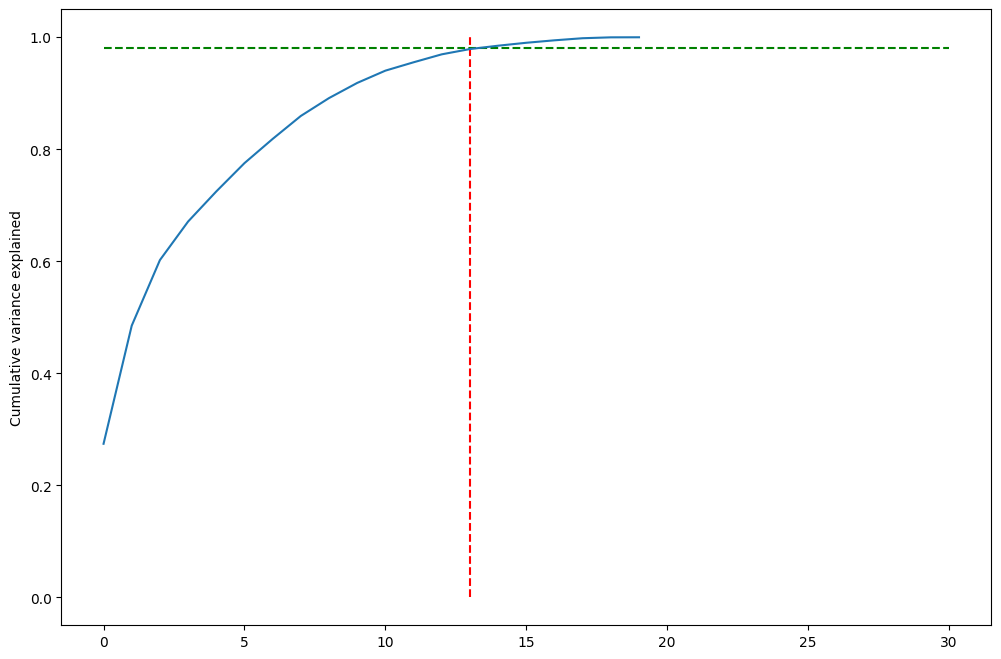

In [223]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=13, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

- We were able to capture 98% variance in pca with 13 components

In [224]:
from sklearn.decomposition import IncrementalPCA

In [225]:
pca_final = IncrementalPCA(n_components=13)

In [226]:
df_train_pca = pca_final.fit_transform(X_train_filtered_scaled)

#### Logistic Regression

In [227]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(df_train_pca, y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [228]:
lr.score(df_train_pca, y_train)

0.9468710542929293

#### XGBoost Classifier

In [229]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

xgbc.fit(df_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [230]:
xgbc.score(df_train_pca, y_train)

0.9763652146464646

#### Hyperparameter tuning

In [249]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

In [250]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# we want to target a better f1 score due to imbalance in data
f1_scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring=f1_scorer, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(df_train_pca, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1.0}
Best F1 score: 0.9462835483328927


In [233]:
# # Evaluate the model on the test set
# test_accuracy = best_model.score(X_test[top_n_features], y_test) # 94.98
# print("Test accuracy: ", test_accuracy)

In [255]:
imp = SimpleImputer(strategy='constant', fill_value=0)
log_data = FunctionTransformer(np.log1p, validate=True)
scale = StandardScaler()
pca = IncrementalPCA(n_components=13)
xgb = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=100,
    subsample=1.0,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [256]:
pipe = Pipeline(steps = [('imputezero',imp),
                         ('logtran',log_transformer),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',xgb)])

In [257]:
pipe.fit(X_train[top_n_features], y_train)

Pipeline(steps=[('imputezero',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('logtran', Log1pTransformer()), ('scaling', StandardScaler()),
                ('pca', IncrementalPCA(n_components=13)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [258]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipe, X_train[top_n_features], y_train, 
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.951389


In [259]:
cv_scores

array([0.94979286, 0.95077925, 0.95107516, 0.95264871, 0.95264871])

In [260]:
# pipe.fit(X_train[top_n_features], y_train)

In [261]:
train_score = pipe.score(X_train[top_n_features], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.956478851010101


In [262]:
test_score = pipe.score(X_test[top_n_features], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.948078592282806


In [263]:
confusion_matrix(y_train, pipe.predict(X_train[top_n_features]))

array([[47122,   592],
       [ 1614,  1360]], dtype=int64)

In [264]:
precision_score(y_test, pipe.predict(X_test[top_n_features]))

0.6126482213438735

In [265]:
recall_score(y_test, pipe.predict(X_test[top_n_features]))

0.4015544041450777

In [266]:
from sklearn.metrics import f1_score

f1_score(y_test, pipe.predict(X_test[top_n_features]))

0.48513302034428796

#### Creating submission file

In [267]:
submission_data = unseen[top_n_features]

In [268]:
unseen['churn_probability'] = pipe.predict(submission_data)

In [269]:
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [270]:
output['churn_probability'].value_counts()

churn_probability
0    27641
1     2359
Name: count, dtype: int64

In [271]:
# output.to_csv('submission_pca_incremental10.csv',index=False)

# Model for Explainability

In [289]:
lr_model = LogisticRegression()

In [290]:
lrpipe = Pipeline(steps = [('imputezero',imp),
                         ('logtran',log_transformer),
                         ('scaling',scale),
                         ('model',lr_model)])

In [291]:
lrpipe.fit(X_train[top_n_features],y_train)

Pipeline(steps=[('imputezero',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('logtran', Log1pTransformer()), ('scaling', StandardScaler()),
                ('model', LogisticRegression())])

In [292]:
y_pred = lrpipe.predict(X_test[top_n_features])

In [293]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11901
           1       0.62      0.28      0.39       772

    accuracy                           0.95     12673
   macro avg       0.79      0.64      0.68     12673
weighted avg       0.93      0.95      0.94     12673



In [294]:
# Extracting the Logistic regression model from pipeline
lr_model = lrpipe.named_steps['model']

# Get the coefficients and intercept
coefficients = lr_model.coef_[0]
intercept = lr_model.intercept_[0]

In [295]:
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature_{i}" for i in range(X_train.shape[1])]

In [296]:
# Construct the equation
equation = f"log(p/(1-p)) = {intercept:.4f}"
for coef, feature in zip(coefficients, feature_names):
    if coef >= 0:
        equation += f" + {coef:.4f} * {feature}"
    else:
        equation += f" - {abs(coef):.4f} * {feature}"

print("\nLogistic Regression Equation:")
print(equation)


Logistic Regression Equation:
log(p/(1-p)) = -3.8968 - 0.1444 * arpu_6 - 0.4119 * arpu_7 - 0.2126 * arpu_8 + 0.4227 * onnet_mou_6 - 0.6101 * onnet_mou_7 - 0.5530 * onnet_mou_8 + 0.2402 * offnet_mou_6 - 0.0934 * offnet_mou_7 - 0.1591 * offnet_mou_8 - 0.0997 * roam_ic_mou_6 + 0.1132 * roam_ic_mou_7 - 0.0374 * roam_ic_mou_8 - 0.1831 * roam_og_mou_6 + 0.0705 * roam_og_mou_7 - 0.0145 * roam_og_mou_8 - 1.1780 * loc_og_t2t_mou_6 - 0.0287 * loc_og_t2t_mou_7 + 0.0258 * loc_og_t2t_mou_8 + 0.6750 * loc_og_t2m_mou_6 + 0.2268 * loc_og_t2m_mou_7


In [304]:
xgb_model = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=100,
    subsample=1.0,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [305]:
xgbpipe = Pipeline(steps = [('imputezero',imp),
                         ('logtran',log_transformer),
                         ('scaling',scale),
                         ('model',xgb_model)])

In [306]:
xgbpipe.fit(X_train[top_n_features],y_train)

Pipeline(steps=[('imputezero',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('logtran', Log1pTransformer()), ('scaling', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='l...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [307]:
y_pred_xgb = xgbpipe.predict(X_test[top_n_features])

In [308]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11901
           1       0.63      0.42      0.50       772

    accuracy                           0.95     12673
   macro avg       0.80      0.70      0.74     12673
weighted avg       0.94      0.95      0.94     12673



In [309]:
xgb_model_from_pipe = xgbpipe.named_steps['model']

We will be using SHAP for better model explainability

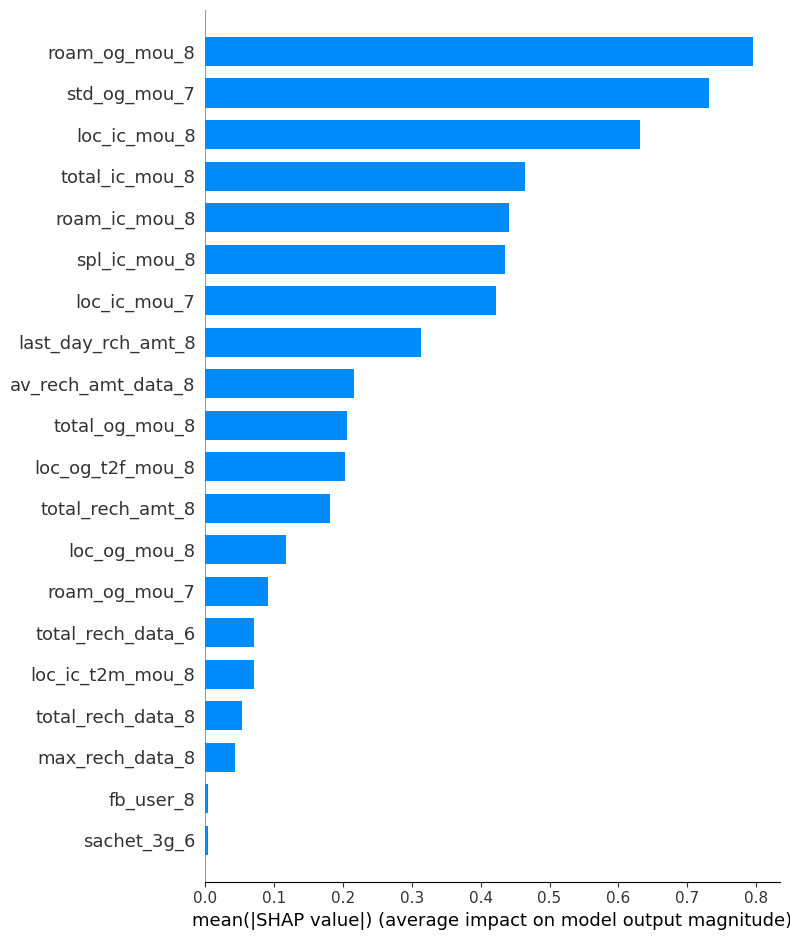

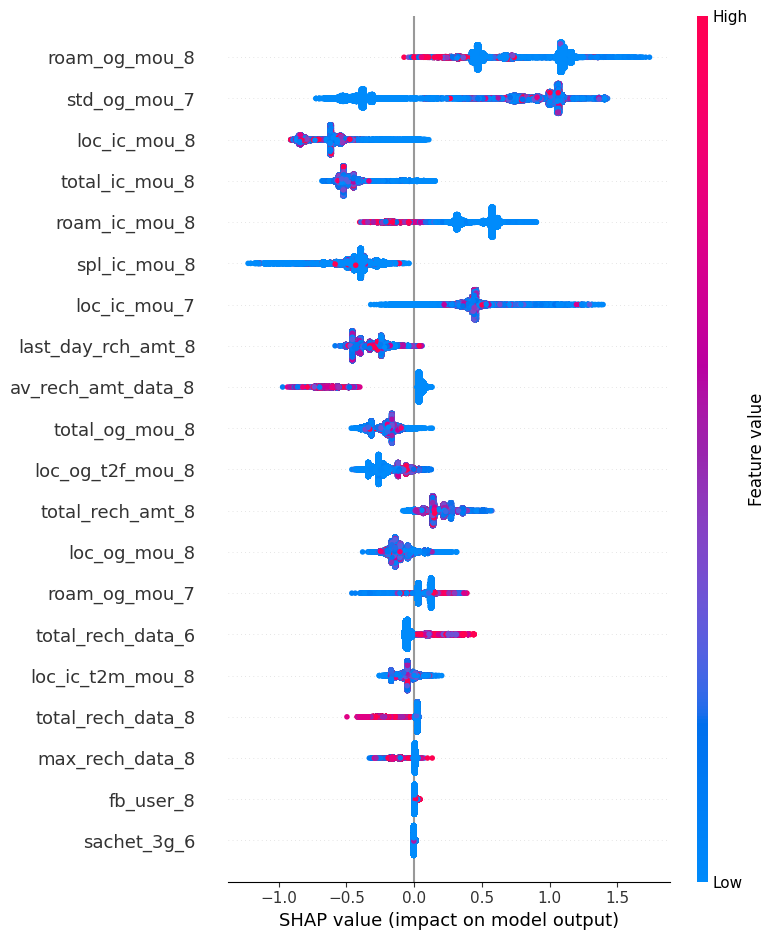

In [310]:
import shap

explainer = shap.TreeExplainer(xgb_model_from_pipe)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train[top_n_features])

shap.summary_plot(shap_values, X_train[top_n_features], plot_type="bar")

# Show the impact of features for individual predictions
shap.summary_plot(shap_values, X_train[top_n_features])

# Conclusion
- Roaming outgoing calls mou & STD calls outgoing mou are on of the biggest factors predicting churn.
- Incoming local and roaming calls also have shown the pattern in customer churn.
- Mostly the last two months of the data have shown the patterns to identify churn.
- Average recharge amount also has shown a significant impact on the churn.

# Business Suggestion
    Try to maximize the offers on data packs which will help to retain customers and will have less churn.